In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("breastcancer.csv")
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(699, 11)

# Data pre-processing

In [4]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

checking the data types of each column

In [5]:
data.dtypes 

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [6]:
data['bare_nucleoli'].head() 

0     1
1    10
2     2
3     4
4     1
Name: bare_nucleoli, dtype: object

In [7]:
data['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

this col contains an undesirable entry '?'

In [8]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


Let us replace these missing values with NaN

In [9]:
df= data.replace('?', np.nan)
df[df['bare_nucleoli']=='?'].sum() 

id                   0.0
clump_thickness      0.0
size_uniformity      0.0
shape_uniformity     0.0
marginal_adhesion    0.0
epithelial_size      0.0
bare_nucleoli        0.0
bland_chromatin      0.0
normal_nucleoli      0.0
mitoses              0.0
class                0.0
dtype: float64

In [10]:
df.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

Drop id 

In [11]:
df.drop("id", axis=1, inplace=True)

Fill the missing values

In [12]:
df.median()

clump_thickness      4.0
size_uniformity      1.0
shape_uniformity     1.0
marginal_adhesion    1.0
epithelial_size      2.0
bare_nucleoli        1.0
bland_chromatin      3.0
normal_nucleoli      1.0
mitoses              1.0
class                2.0
dtype: float64

In [13]:
df.mode()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1,1,1,1,2,1,2,1,1,2


In [14]:
df.fillna(df.median(), inplace=True)

In [15]:
df.isna().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

bare_nucleoli is still object type

In [16]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

change type of bare_nucleoli from object to int64

In [17]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [18]:
df.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

# EDA


In [19]:
sns.set_style("darkgrid")

In [20]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [21]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


Bivariate Data Analysis

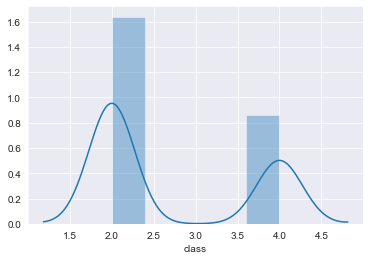

In [22]:
sns.distplot(df['class'])

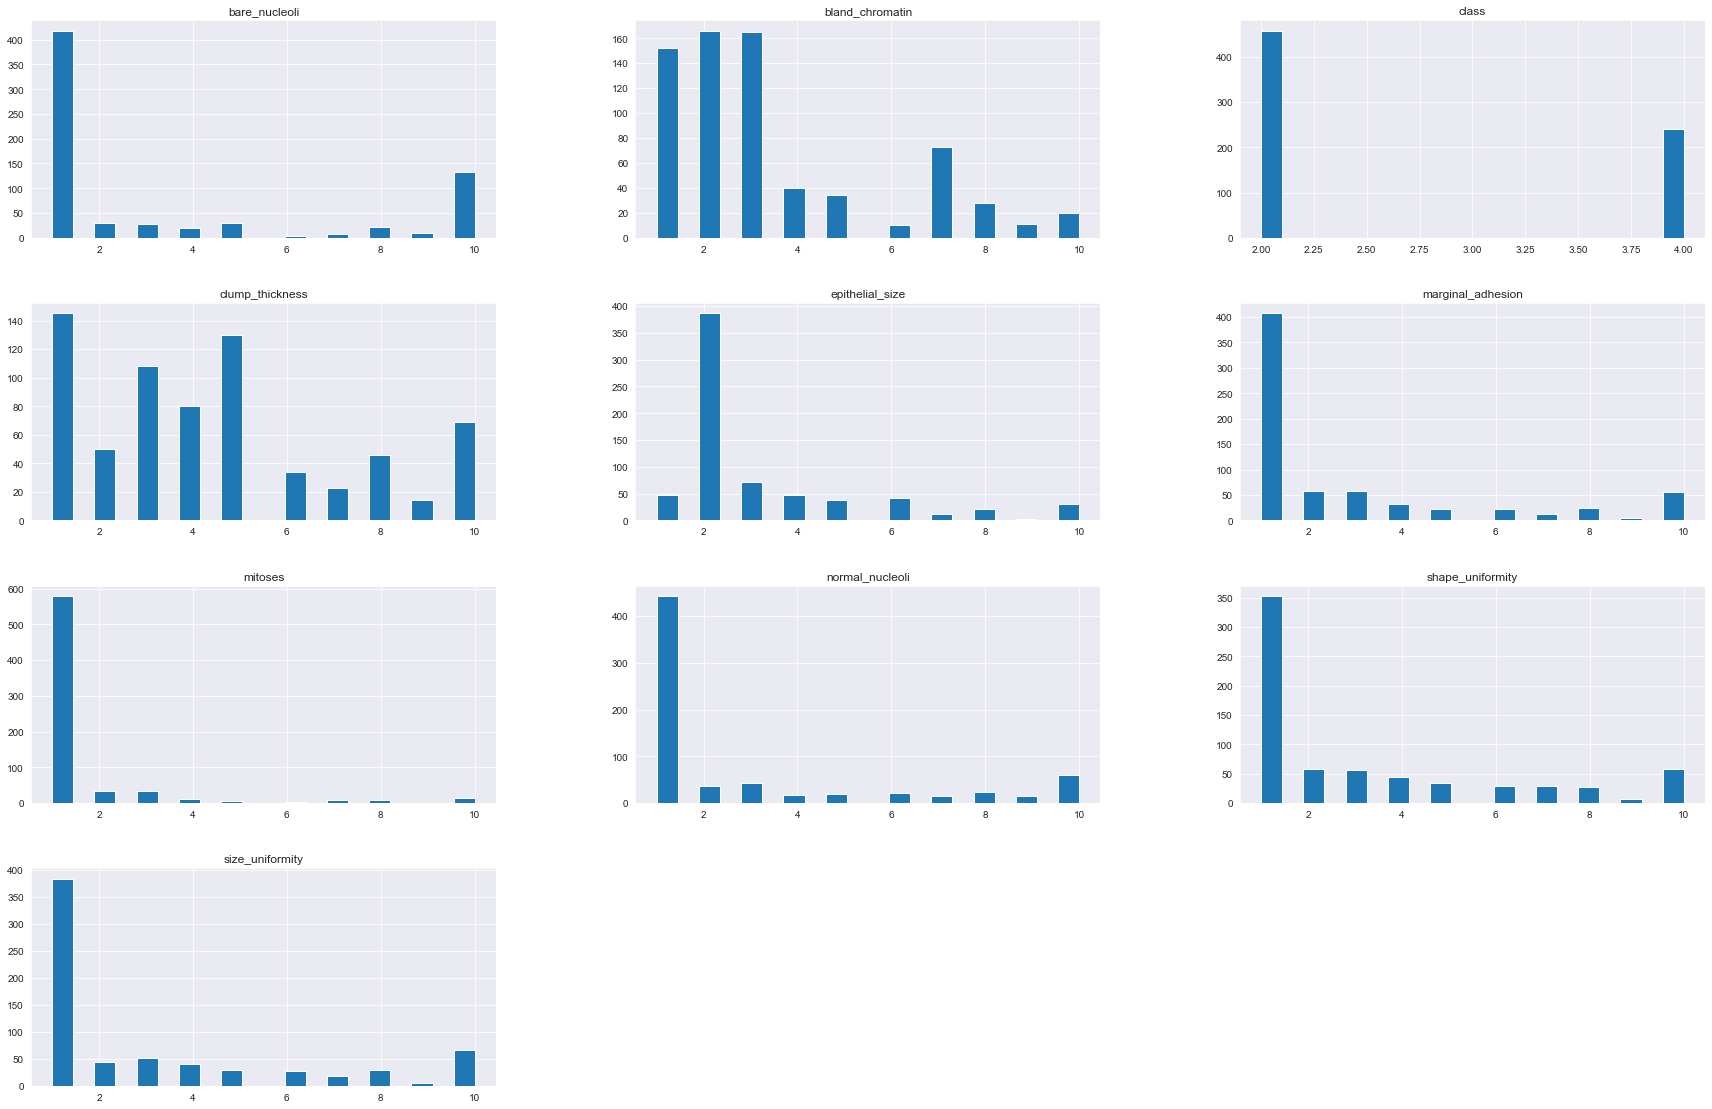

In [23]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

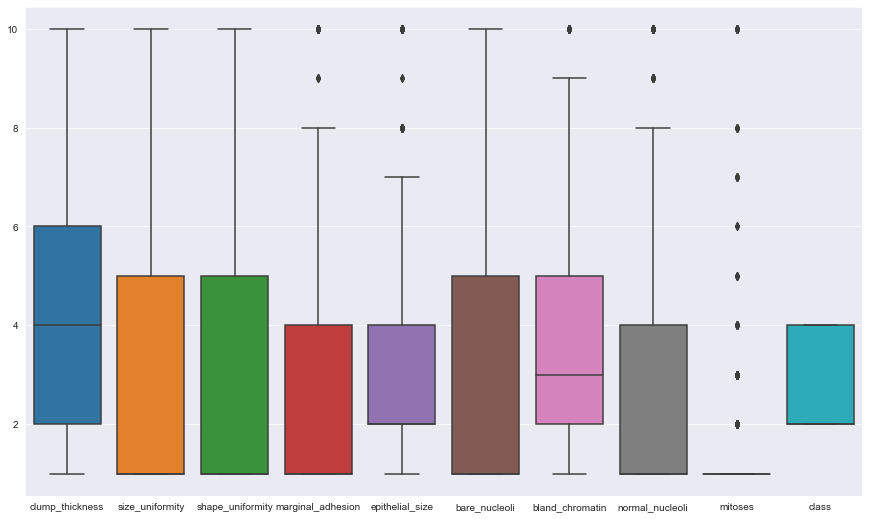

In [24]:
plt.figure(figsize= (15,9))
sns.boxplot(data=df)

Check correlation

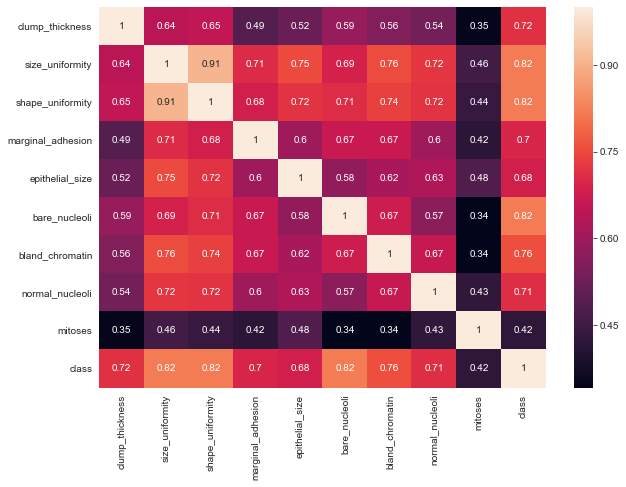

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

pairplot

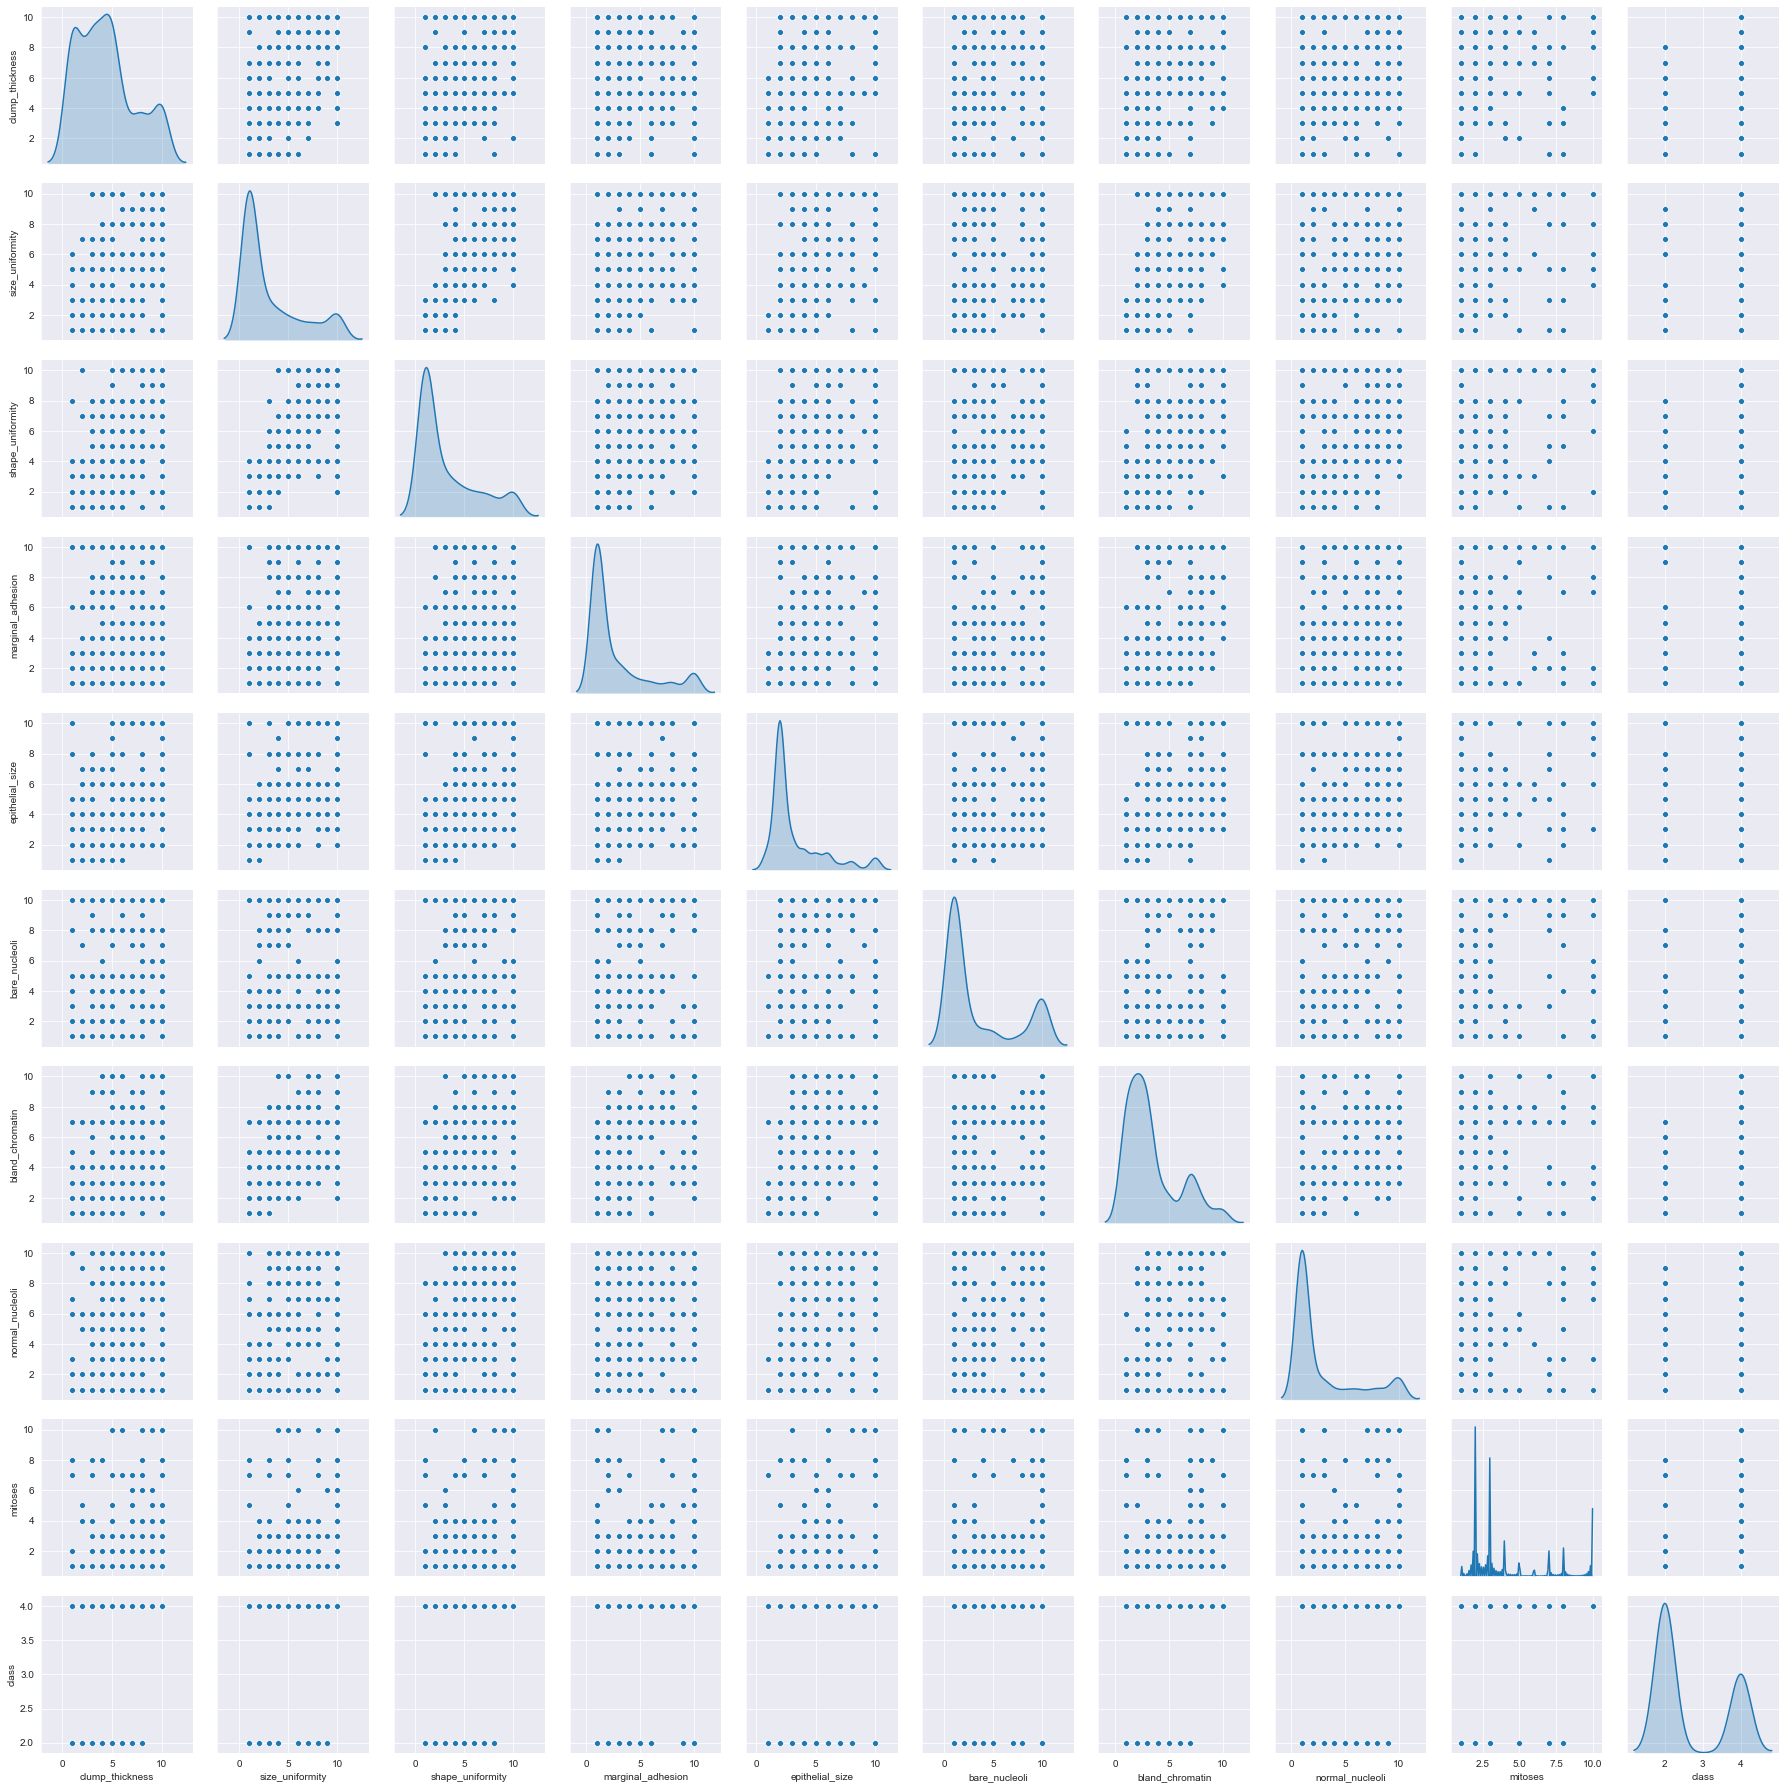

In [26]:
sns.pairplot(df, diag_kind="kde")

# Splitting Data

In [27]:
X = df.drop('class', axis=1)
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Building Model

In [28]:
models = {
    "        K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "                        SVM Classifier": SVC(),
}

# Training 

In [29]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

        K-Nearest Neighbors Classifier trained.
                        SVM Classifier trained.


# Testing

In [30]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')    

        K-Nearest Neighbors Classifier
------------------------------------------------------------
Testing Accuracy: 0.97143
Training Accuracy: 0.97137
------------------------------------------------------------


                        SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.96190
Training Accuracy: 0.99387
------------------------------------------------------------




# Hypertuning

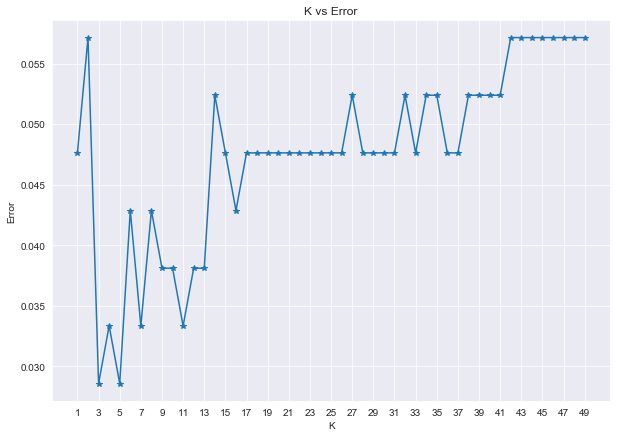

In [31]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,7))
plt.xlabel("K")
plt.ylabel("Error")
plt.plot(range(1,50), error, marker = "*")
plt.xticks(range(1,50,2))
plt.title("K vs Error")
plt.show()


In [32]:
params = {
            'C': [1, 3, 5, 7], 
            'gamma': [0.01, 0.1, 0.0025],
            'kernel' : ['linear', 'rbf']
        }

In [33]:
grid_clf = GridSearchCV(SVC(), params, cv = 7)

In [34]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 3, 5, 7], 'gamma': [0.01, 0.1, 0.0025],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print("Testing Accuracy: ", grid_clf.score(X_test, y_test))
print("Training Accuracy: ", grid_clf.score(X_train, y_train))
print("--------------------------------")
print("Best Parameters:")
print(grid_clf.best_params_)

Testing Accuracy:  0.9714285714285714
Training Accuracy:  0.967280163599182
--------------------------------
Best Parameters:
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


# Evaluation

In [36]:
models = {
    "        K-Nearest Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "                        SVM Classifier": SVC(C=1, gamma=0.01, kernel='linear'),
}

In [37]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

        K-Nearest Neighbors Classifier trained.
                        SVM Classifier trained.


In [38]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')    

        K-Nearest Neighbors Classifier
------------------------------------------------------------
Testing Accuracy: 0.97143
Training Accuracy: 0.97137
------------------------------------------------------------


                        SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.97143
Training Accuracy: 0.96728
------------------------------------------------------------




In [39]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=5))
    print("-----------------------------------------------------")

        K-Nearest Neighbors Classifier 

[0.97674419 0.93023256 1.         1.         0.97560976]
-----------------------------------------------------
                        SVM Classifier 

[0.95348837 0.95348837 1.         1.         0.90243902]
-----------------------------------------------------


In [40]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [41]:
for name, model in models.items():
    evalModel(name, model)

        K-Nearest Neighbors Classifier

Confusion Matrix
[[136   1]
 [  5  68]]

Classifiation Report
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210

                        SVM Classifier

Confusion Matrix
[[135   2]
 [  4  69]]

Classifiation Report
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.97      0.95      0.96        73

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



        K-Nearest Neighbors Classifier


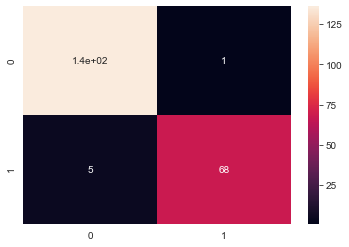

                        SVM Classifier


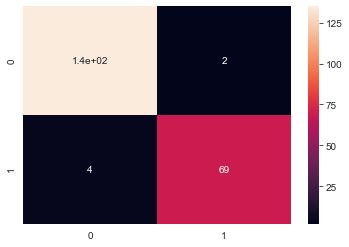

In [42]:
for name, model in models.items():
    print(name)
    pred = model.predict(X_test)
    sns.heatmap((confusion_matrix(y_test,pred)), annot=True)
    plt.show()

Comparing predictions of classifiers

In [43]:
df1=pd.DataFrame(columns=["        K-Nearest Neighbors Classifier", "                        SVM Classifier"])

In [44]:
df1

,K-Nearest Neighbors Classifier,SVM Classifier


In [45]:
for name, model in models.items():
    pred = model.predict(X_test)
    df1[name] = pred

In [46]:
df1

,K-Nearest Neighbors Classifier,SVM Classifier
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,4,4
7,2,2
8,2,2
9,2,2


In [47]:
df1[df1['                        SVM Classifier'] != df1['        K-Nearest Neighbors Classifier']]

,K-Nearest Neighbors Classifier,SVM Classifier
13,2,4
55,4,2
59,2,4
74,4,2
188,2,4
208,2,4
